Selected Folder: /Users/joschameiers/Desktop/Science & Work/Harvard/Virtual-Labbook_R-Space/Human-Microbiome-Extract-Library_Antibiotic-Activity-Screening/Antimicrobial Activity Assay/HME-screen/231214_HME5-screen_C-albicansANDE-coli-wt/input/E. coli 251113 wt
Folder already exists at /Users/joschameiers/Desktop/Science & Work/Harvard/Virtual-Labbook_R-Space/Human-Microbiome-Extract-Library_Antibiotic-Activity-Screening/Antimicrobial Activity Assay/HME-screen/231214_HME5-screen_C-albicansANDE-coli-wt/input/E. coli 251113 wt/output/
Readme file created at: /Users/joschameiers/Desktop/Science & Work/Harvard/Virtual-Labbook_R-Space/Human-Microbiome-Extract-Library_Antibiotic-Activity-Screening/Antimicrobial Activity Assay/HME-screen/231214_HME5-screen_C-albicansANDE-coli-wt/input/E. coli 251113 wt/output/README.txt
Quality control of transformed data (/Users/joschameiers/Desktop/Science & Work/Harvard/Virtual-Labbook_R-Space/Human-Microbiome-Extract-Library_Antibiotic-Activity-Screening/A

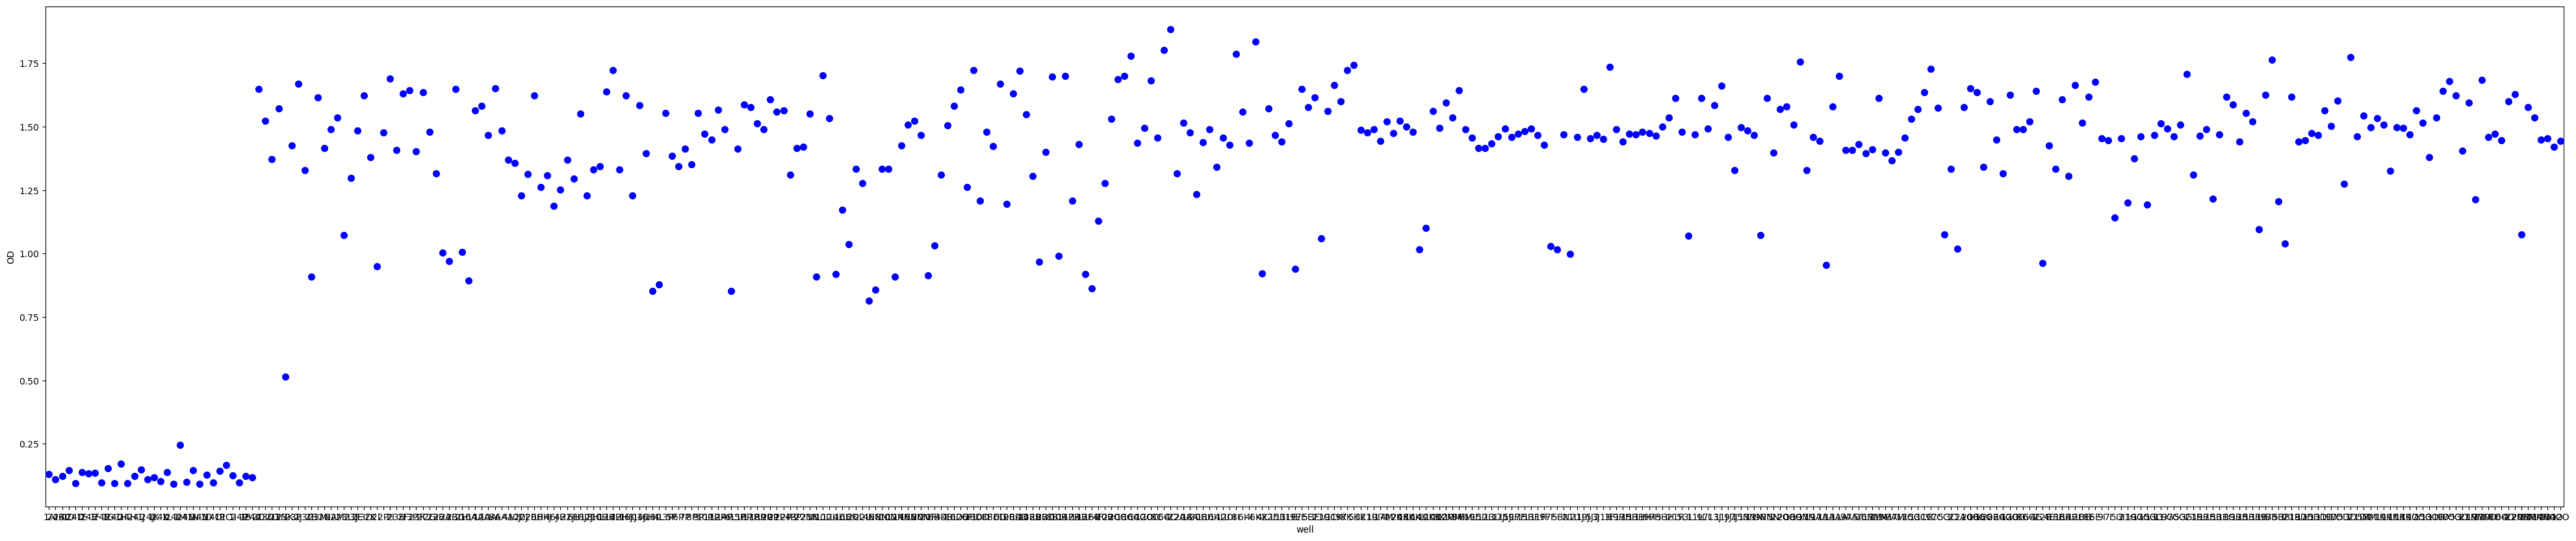

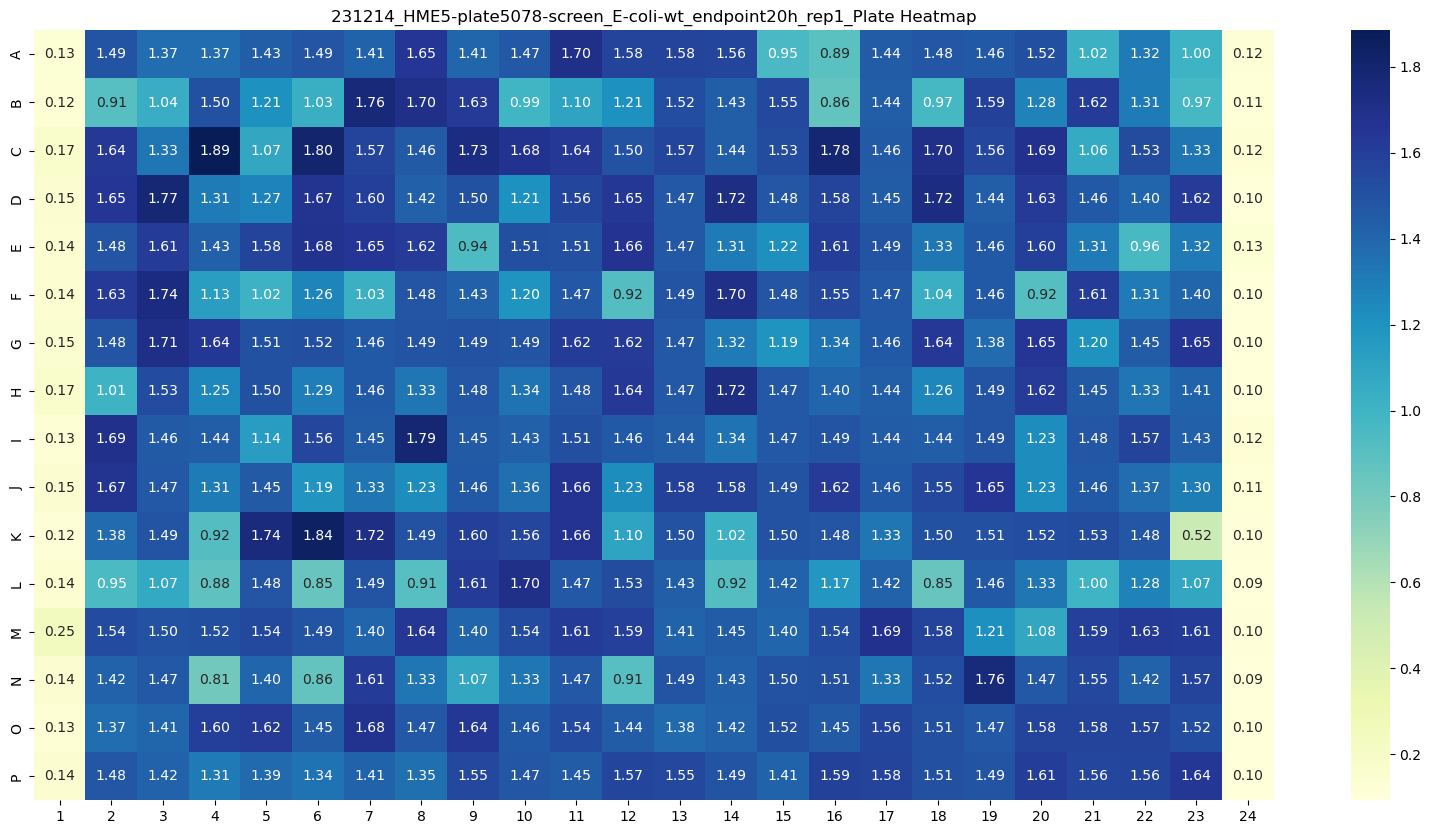

hit threshold (%inhibition): 35
z-factor of this plate is 0.24839268154692462
                                             condition   mean_OD    std_OD  \
0      Ab_10; Acinetobacter baumannii; Ab17978-pel-NF5  1.444000       NaN   
1      Ab_11; Acinetobacter baumannii; Ab17978-pel-NF6  1.420000       NaN   
2      Ab_12; Acinetobacter baumannii; Ab17978-pel-NF7  1.454000       NaN   
3    Ab_1; Acinetobacter baumannii; Ab17978-pellet ext  1.450000       NaN   
4      Ab_2; Acinetobacter baumannii; Ab17978-sup>100k  1.536000       NaN   
..                                                 ...       ...       ...   
227            fn-5; fusobacterium nucleatum; Fn4355-5  1.583000       NaN   
228          fn-s1; fusobacterium nucleatum; Fn4355-s1  1.565000       NaN   
229          fn-s2; fusobacterium nucleatum; Fn4355-s2  0.893000       NaN   
230                                                neg  1.379531  0.282714   
231                                                pos  0.126312

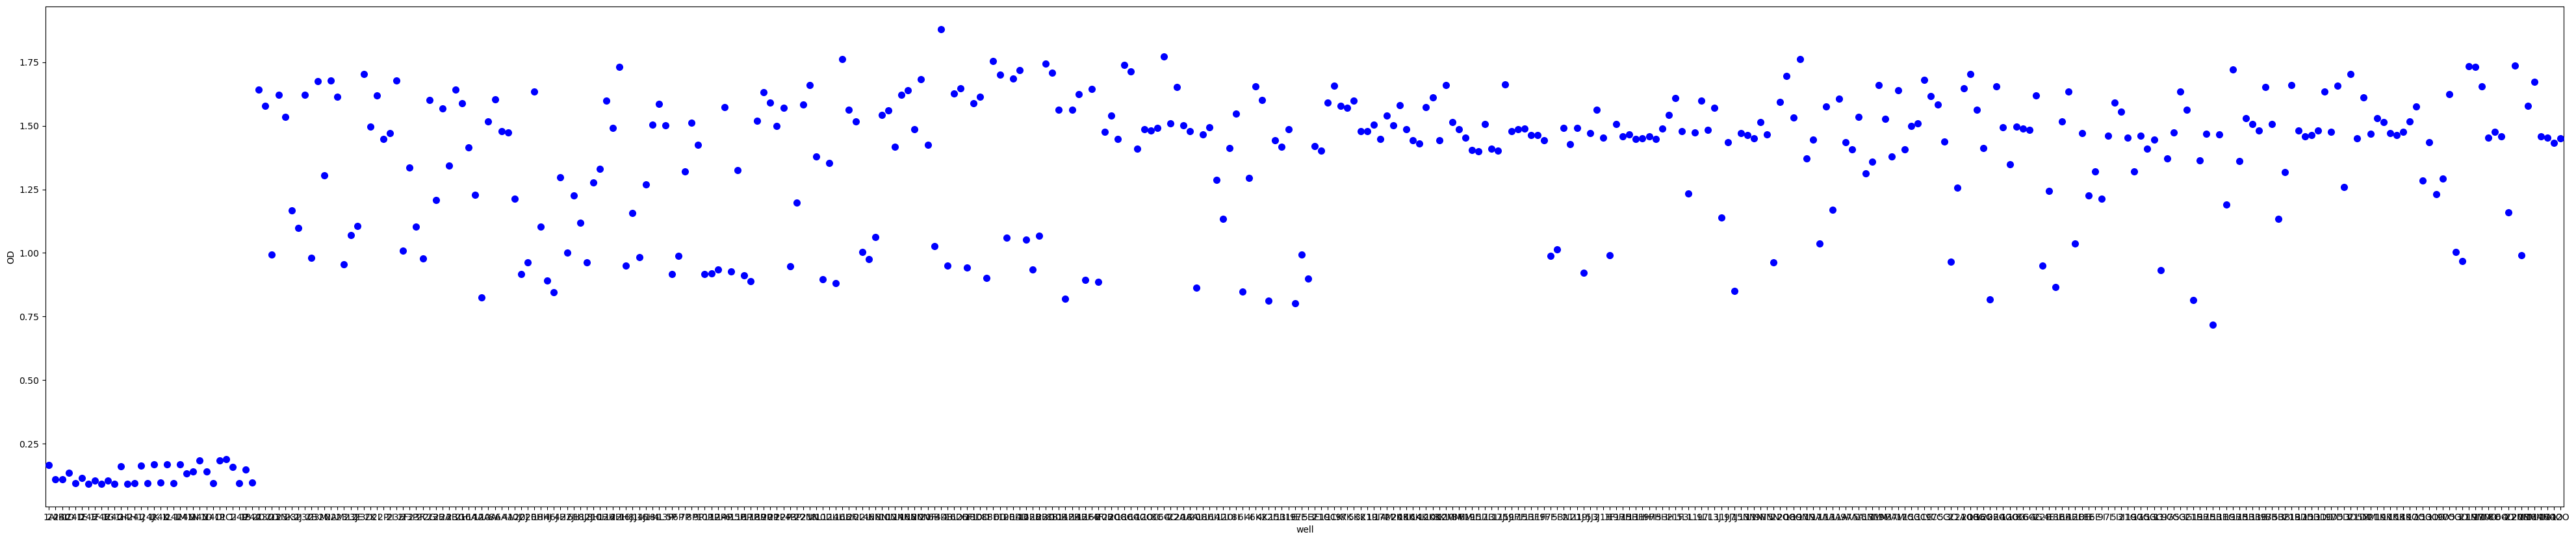

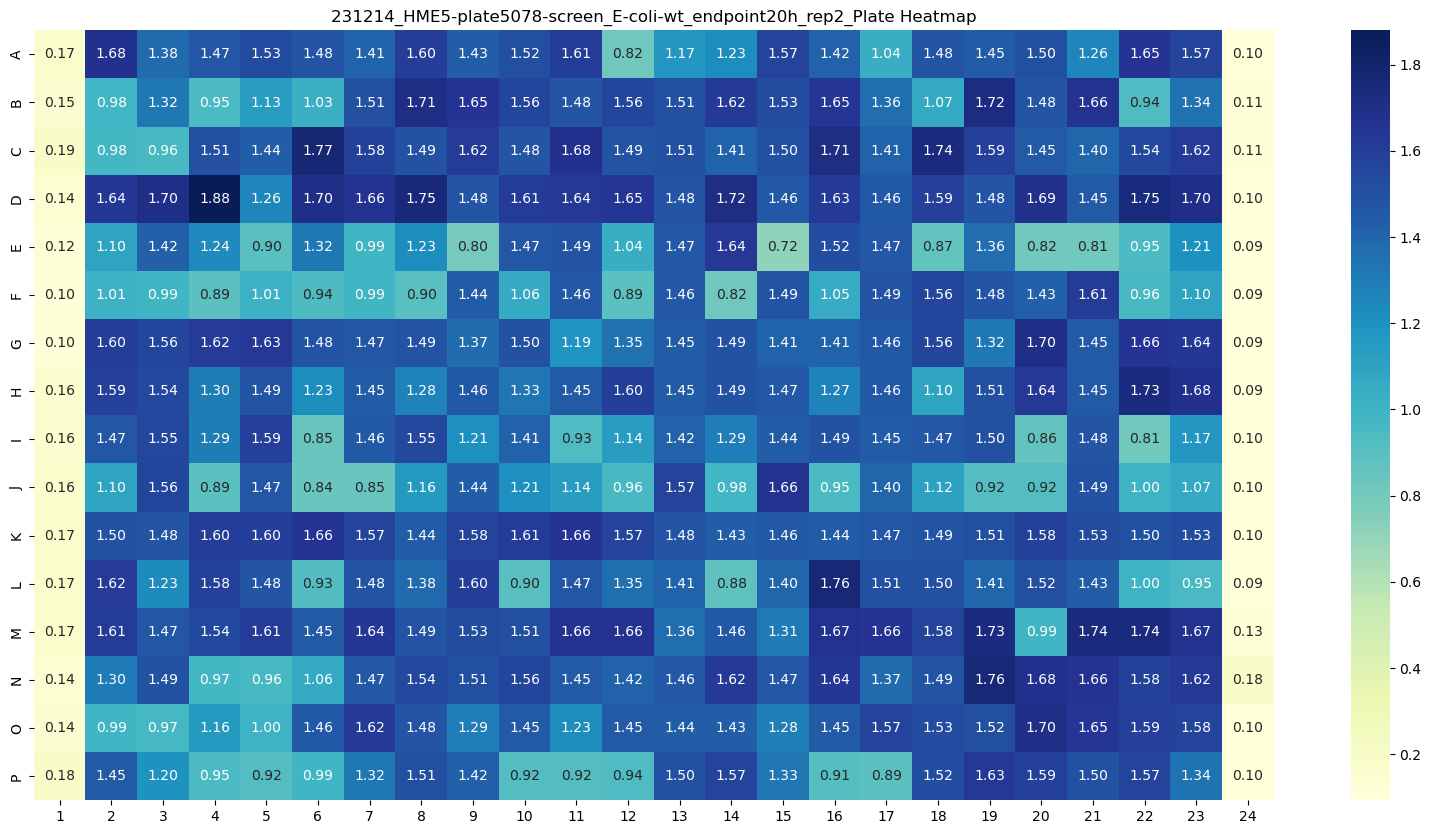

hit threshold (%inhibition): 35
z-factor of this plate is 0.29193252147792703
                                             condition   mean_OD    std_OD  \
0      Ab_10; Acinetobacter baumannii; Ab17978-pel-NF5  1.450000       NaN   
1      Ab_11; Acinetobacter baumannii; Ab17978-pel-NF6  1.433000       NaN   
2      Ab_12; Acinetobacter baumannii; Ab17978-pel-NF7  1.454000       NaN   
3    Ab_1; Acinetobacter baumannii; Ab17978-pellet ext  1.458000       NaN   
4      Ab_2; Acinetobacter baumannii; Ab17978-sup>100k  1.673000       NaN   
..                                                 ...       ...       ...   
227            fn-5; fusobacterium nucleatum; Fn4355-5  0.824000       NaN   
228          fn-s1; fusobacterium nucleatum; Fn4355-s1  1.228000       NaN   
229          fn-s2; fusobacterium nucleatum; Fn4355-s2  1.415000       NaN   
230                                                neg  1.388281  0.263357   
231                                                pos  0.128000

In [60]:
# v3.7 is supposed to take data from a real screen and identify hits if there are any


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tkinter as tk
from tkinter import filedialog


def create_folder(input_path):
    input_path = input_path
    folder_path = input_path + "/output/"
    if not os.path.exists(folder_path):
        output_folder = os.makedirs(folder_path)
        print(f"Folder created at {folder_path}")
    else:
        print(f"Folder already exists at {folder_path}")
    return folder_path, input_path

def create_readme(folder_path, code_version):
    # this will create a readme-file that roughly explains how the data was transformed,
    # describes input expectation, which version of the code was used, and where the data was stored.
    readme_content = f"""README

- The code version used: {code_version}

Storage Information:
- The transformed data and output files are stored in the following directory:
  {folder_path}
"""
    readme_path = os.path.join(folder_path, 'README.txt')

    with open(readme_path, 'w') as readme_file:
        readme_file.write(readme_content)

    print(f'Readme file created at: {readme_path}')


def datafiles(input_path):
    # Get all CSV files in the specified folder excluding metadata.csv
    csv_files = [file for file in os.listdir(input_path) if file.endswith('.csv') and file != 'metadata.csv']
    return csv_files

def detect_delimiter(file_path):
    with open(file_path, 'r') as file:
        # Read only the first line to detect the delimiter
        # this code expects "condition, strain" as the argument of each well, so there naturally are ","
        # in any rows beyond the first 
        first_line = file.readline()
    
    # Check for the presence of common delimiters
    if ',' in first_line:
        return ','
    elif ';' in first_line:
        return ';'

def prepare_data(data_input):
    delimiter = detect_delimiter(data_input)
    data = pd.read_csv(data_input, sep=delimiter, index_col=0, engine='python')
    data_T = data.T
    data_T = data_T.reset_index()
    data_T = data_T.rename(columns={'index': 'well'})
    data_T_melt = pd.melt(data_T, id_vars=['well'], var_name='OD')
    data_T_melt['well'] = data_T_melt['well'] + data_T_melt['OD'].astype(str)
    data_T_melt = data_T_melt[['well', 'value']]
    data_T_melt = data_T_melt.rename(columns={'value': 'OD'})
    print(f"Quality control of transformed data ({data_input}):\n")
    print(data_T_melt)
    return data_T_melt, data

def prepare_metadata(metadata_input):
    delimiter = detect_delimiter(metadata_input)
    metadata = pd.read_csv(metadata_input, sep=',', index_col=0)
    metadata_T = metadata.T
    meatadata_T = metadata_T.reset_index()
    metadata_T = meatadata_T.rename(columns={'index': 'well'})
    metadata_T_melt = pd.melt(metadata_T, id_vars=['well'], var_name='condition')
    metadata_T_melt['well'] = metadata_T_melt['well'] + metadata_T_melt['condition'].astype(str)
    metadata_T_melt = metadata_T_melt[['well', 'value']]
    metadata_T_melt = metadata_T_melt.rename(columns={'value': 'condition'})
    print(f"Quality control of transformed metadata ({metadata_input}):\n")
    print(metadata_T_melt)
    return metadata_T_melt

def merge(data, metadata, folder, data_name):
    merged_data = pd.merge(data, metadata, on='well')
    #merged_data = merged_data.drop("well", axis=1)
    merged_data = merged_data.sort_values(by='condition', ascending=False)
    merged_data.to_csv(os.path.join(folder, f'{data_name}_merged_data.csv'), index=False)
    print(f"Quality control of merged data ({data_name}_merged_data.csv):\n")
    print(merged_data)
    print(f"Saved at: {os.path.join(folder)}")
    return merged_data

def group_data(data_merged, folder, data_name):
    grouped_data = data_merged.groupby('condition').agg({'OD': ['mean', 'std']})
    grouped_data.reset_index(inplace=True)
    grouped_data.columns = ['condition', 'mean_OD', 'std_OD']
    print(f"Quality control of grouped data ({data_name}_merged_data.csv):\n")
    print(grouped_data)
    return grouped_data
    
def define_hits(data_grouped, folder_path, data_name):
    hit_threshold = input("hit threshold (%inhibition): ")
    hit_threshold = float(hit_threshold)
    
    # Extract mean and std for positive (pos) and negative (neg) controls
    mean_pos = data_grouped.loc[data_grouped['condition']=='pos', 'mean_OD'].values[0]
    std_pos = data_grouped.loc[data_grouped['condition']=='pos', 'std_OD'].values[0]
    mean_neg = data_grouped.loc[data_grouped['condition']=='neg', 'mean_OD'].values[0]
    std_neg = data_grouped.loc[data_grouped['condition']=='neg', 'std_OD'].values[0]
    
    # Calculate z-factor
    z_factor = 1 - (3 * (std_pos + std_neg) / abs(mean_neg - mean_pos))
    print(f"z-factor of this plate is {z_factor}")
    
    # calculate %inhibition based on positive and negative controls
    #percent_inhibition = mean_neg - sample / mean_neg-mean_pos
    data_grouped['%inhibition'] = ((mean_neg - data_grouped['mean_OD'])/(mean_neg - mean_pos))*100
    data_grouped['%inhibition'] = round(data_grouped['%inhibition'], 0)
    print(data_grouped)
    data_grouped.to_csv(os.path.join(folder_path, f'{data_name}_data-grouped.csv'), index=False)
    hits = data_grouped[data_grouped['%inhibition'] > hit_threshold][['condition', 'mean_OD', '%inhibition']]
    print(f"Hits with percent inhibition greater than {hit_threshold}:")
    print(hits)
    hits.to_csv(os.path.join(folder_path, f'{data_name}_hits.csv'), index=False)
    

def plot_BarGraph(data_grouped, data_merged, folder_path, data_name, fig_size_bar, dpi):
    # Create a figure with the specified size
    plt.figure(figsize=fig_size_bar)

    # Use Seaborn's stripplot to create the dot plot with error bars
    sns.stripplot(x="well", y="OD", data=data_merged, jitter=True, color='blue', size=8)      
     
    # Show the plot
    print(f"Saved at: {os.path.join(folder_path)}")
    plt.savefig(os.path.join(folder_path, f'{data_name}_bar-graph.png'), dpi=dpi)
    plt.show()
    
def generate_heatmap(data, folder_path, data_name, fig_size_heat, dpi):
    plt.figure(figsize=fig_size_heat)
    sns.heatmap(data, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True, square=False)
    plt.title(f'{data_name}_Plate Heatmap')
    plt.savefig(os.path.join(folder_path, f'{data_name}_heat-map.png'), dpi=dpi)
    plt.show()

def main():
    ############################
    ### update code version! ###
    code_version = "v3.7"    ###
    ### update code version! ###
    ############################
    
    # graph output size and resolution
    fig_size_bar = (50, 10)
    fig_size_heat = (20, 10)
    dpi = 300
    
    # Create the root window (it won't be shown)
    root = tk.Tk()
    root.withdraw()

    # Ask the user to choose a directory
    file_path = filedialog.askdirectory(title="Select Folder Containing CSV Files")

    # Display the chosen folder path
    print(f"Selected Folder: {file_path}")

    folder_path, input_path = create_folder(file_path)
    csv_files = datafiles(input_path)
    create_readme(folder_path, code_version)

    for csv_file in csv_files:
        data_T_melt, data = prepare_data(os.path.join(input_path, csv_file))
        metadata_T_melt = prepare_metadata(os.path.join(input_path, 'metadata.csv'))  # Assuming metadata.csv is fixed
        merged_data = merge(data_T_melt, metadata_T_melt, folder_path, csv_file[:-4])
        grouped_data = group_data(merged_data, folder_path, csv_file[:-4])
        plot_BarGraph(grouped_data, merged_data, folder_path, csv_file[:-4], fig_size_bar, dpi)
        generate_heatmap(data, folder_path, csv_file[:-4], fig_size_heat, dpi)
        define_hits(grouped_data, folder_path, csv_file[:-4])

if __name__ == "__main__":
    main()
    